<a href="https://colab.research.google.com/github/psaw/hse-ai24-ml/blob/main/GD_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Градиентный спуск. Практика

## Импорт библиотек, установка константных значений

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_regression, fetch_california_housing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
RANDOM_STATE = 123
TRAIN_SIZE = 0.75

In [3]:
np.random.RandomState(RANDOM_STATE)

RandomState(MT19937) at 0x7DD3CF7C8D40

In [22]:
np.random.seed(RANDOM_STATE)

X, y, _ = make_regression(n_samples=100000,              # число объектов
                          n_features=10,                 # число признаков
                          n_informative=8,               # число информативных признаков
                          noise=100,                     # уровень шума в данных
                          coef=True,                     # значение True используется при генерации данных
                          random_state=RANDOM_STATE)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

## Практика

Реализуем метод градиентного спуска для обучения линейной регрессии.

### Задание 1 (1 балл)


Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле:

$$w = (X^TX)^{-1}X^Ty$$

Комментарий: для поиска решения в векторном виде сначала необходимо добавить единичный столбец к матрице $X$.
Это сделано в коде.

In [23]:
def ols_solution(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    # ваш код здесь
    w = np.linalg.inv(X.T @ X) @ X.T @ y

    return w

### Задание 2 (1 балл)

Заполните функцию для предсказания модели по формуле
$$a(X)=Xw$$

In [24]:
def prediction(X, w):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    # ваш код здесь
    predictions = X @ w

    return predictions

Продублируем функцию для вычисления значения MSE из урока

In [25]:
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

### Задание 3

Скопируйте метод градиентного спуска из [урока](https://colab.research.google.com/drive/1Bos0LeQP9AAB-nrS0z8b-8ag5xRSEdty?usp=sharing) в этот ноутбук.


In [28]:
# ваш код здесь
def gradient_descent(X, y, learning_rate, iterations):

    X_b = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем к Х столбец из 1
    params = np.random.rand(X_b.shape[1])

    m = len(y)

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X_b.T @ ((X_b @ params) - y))
        cost_track[i] = compute_cost(X_b, y, params)

    return cost_track, params

def predict(X, params):
    X_b = np.hstack((np.ones((X_b.shape[0], 1)), X_b))
    return X_b @ params

### Бонус для отважных

Если чувствуете в себе силы, попробуйте написать SGD сами.

Модифицируйте метод градиентного спуска из урока так, чтобы это теперь был метод стохастического градиентного спуска:

* на каждой итерации выбирайте один случайный индекс `j` при помощи функции `random.randint`

* градиент на каждой итерации градиентного спуска считайте не как сумму градиентов по всем объектам, а только по одному объекту с индексом `j`

* на каждой итерации вычисляйте значение функции потерь и сохраняйте в список `cost_track`, который верните вместе с результатом работы функции

In [65]:
import random

def stochastic_gradient_descent(X, y, learning_rate, iterations):
    # Добавляем единичный столбец к матрице X
    X_b = np.hstack((np.ones((X.shape[0], 1)), X))
    # Инициализация параметров случайными значениями
    params = np.random.rand(X_b.shape[1])

    j = 0

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):

        # выберите случайный индекс в диапазон от 0 до len(X)-1 включительно при помощи функции random.randint
        j = random.randint(0, len(y) - 1)

        # обновите веса, используя сдвиг по градиенту только по объекту X[j] (делить на m в данном случае не нужно)
        gradient = X_b[j] @ params
        gradient = gradient - y[j]
        gradient = X_b[j].T * gradient

        params -= learning_rate * gradient              # Обновление параметров
        cost_track[i] = compute_cost(X_b, y, params)

    return cost_track, params

In [48]:
import random

def stochastic_gradient_descent(X, y, learning_rate, iterations):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Добавляем столбец единиц
    m = len(y)
    params = np.random.rand(X_b.shape[1])
    cost_track = np.zeros(iterations)

    for i in range(iterations):
        j = random.randint(0, m - 1)  # Случайный индекс
        gradient = (X_b[j].T @ (X_b[j] @ params - y[j]))  # Градиент для одного примера
        params -= learning_rate * gradient
        cost_track[i] = compute_cost(X_b, y, params)

    return cost_track, params

- Обучите линейную регрессию тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии ($X, y$). Для GD и самостоятельно написанного SGD используйте `learning_rate = 0.01, iterations = 10000`.

*P.S. Если же вы используете не самописный SGD, а SGDRegressor из библиотеки sklearn.linear_model, то его объявляйте с гиперпараметрами по умолчанию, то есть в скобках при объявлении модели ничего не указывайте.*

- С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (`from sklearn.metrics import r2_score`). Для получения предсказания использовуйте функцию `predict`.


In [ ]:
# Параметры обучения

# 1 - находим веса одним из методов

# 2 - применяем функцию prediction для получения предсказаний с найденными весами (либо predict в случае использования SGDRegressor из библиотеки sklearn)

# 3 - вычисляем значение метрики r2

In [30]:
from sklearn.metrics import r2_score

In [31]:
# your code for OLS here
learning_rate = 0.01
iterations = 10000


## Quiz

Чему равно значение метрики $R^2$ для аналитического подхода?

Ответ округлите до сотых.

In [32]:
# Обучение по точной формуле
w_exact = ols_solution(X, y)
y_exact = prediction(X, w_exact)
r2_exact = r2_score(y, y_exact)
print(f'{r2_exact=}')

r2_exact=0.7545372732317198


In [33]:
# Обучение с помощью GD
cost_gd, w_gd = gradient_descent(X, y, learning_rate, iterations)
y_gd = prediction(X, w_gd)
r2_gd = r2_score(y, y_gd)
print(f'{r2_gd=}')

r2_gd=0.7554626185750483


In [66]:

# Обучение с помощью SGD
cost_sgd, w_sgd = stochastic_gradient_descent(X, y, learning_rate, iterations)
y_sgd = prediction(X, w_sgd)
r2_sgd = r2_score(y, y_sgd)
print(f'{r2_sgd=}')

<ipython-input-25-0b3fc56398f9>:3: RuntimeWarning: overflow encountered in matmul
  cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
<ipython-input-65-2f2421c39d31>:21: RuntimeWarning: overflow encountered in multiply
  gradient = X_b[j].T * gradient
<ipython-input-65-2f2421c39d31>:23: RuntimeWarning: invalid value encountered in subtract
  params -= learning_rate * gradient              # Обновление параметров


ValueError: Input contains NaN.

## Quiz

Нарисуйте траекторию уменьшения ошибки при обучении градиентного спуска (это параметр `cost_track`, возвращаемый функцией).

Чему приблизительно равен loss модели на последних итерациях?

Выберите наиболее близкий к полученному вами ответ.

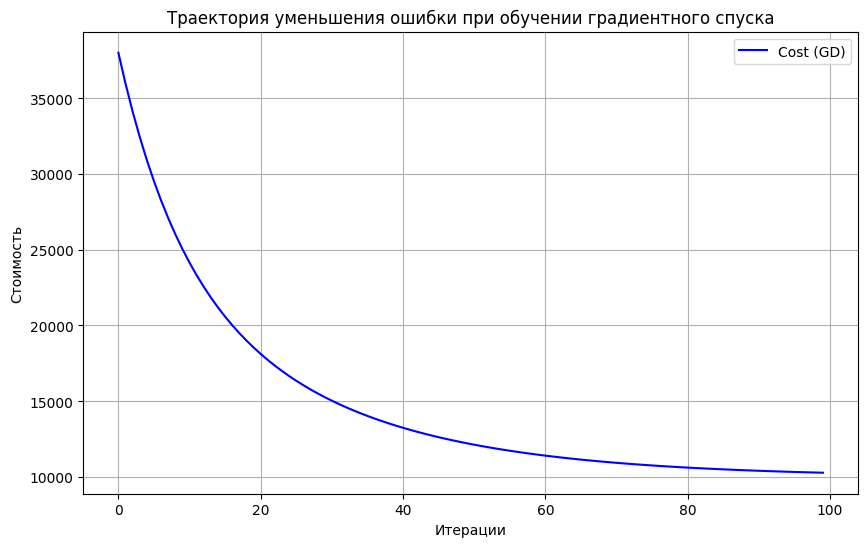

In [57]:
import matplotlib.pyplot as plt
# your code here
# Визуализация траектории уменьшения ошибки
plt.figure(figsize=(10, 6))
plt.plot(cost_gd[:100], label='Cost (GD)', color='blue')  # Показываем только первые 100 итераций для наглядности
plt.title('Траектория уменьшения ошибки при обучении градиентного спуска')
plt.xlabel('Итерации')
plt.ylabel('Стоимость')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# your code for SGD here


## Quiz

Измерьте время работы аналитического подхода, а также GD и SGD (используйте magic command [`%%time`](https://ipython.readthedocs.io/en/stable/interactive/magics.html)).

Упорядочите результаты по возрастанию.

In [ ]:
%%time


## Тестирование моделей на реальных данных

В реальных задачах никто не пишет методы с нуля, если они уже реализованы в python. Самостоятельная реализация методов полезна для получения навыков программирования и более глубокого понимания алгоритмов.

Давайте применим уже готовые методы из `sklearn` для решения задачи регрессии.

In [58]:
data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

Разобъем данные на трейн и тест

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=TRAIN_SIZE,
    random_state=RANDOM_STATE
    )

Для решения этой задачи попробуйте следующие модели:

* `LinearRegression` из `sklearn`
* `SGDRegressor` из `sklearn`

Обучите модели на тренировочных данных с параметрами по умолчанию и сделайте предсказание на тесте.
Вычислите значение $R^2$

In [61]:
# ваш код здесь (Linear Regression)
from sklearn.linear_model import LinearRegression, SGDRegressor

lr = LinearRegression()
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred)
print(r2_lr)

0.6078944086580236


In [62]:
sgdr = SGDRegressor()
sgdr = sgdr.fit(X_train, y_train)
y_pred2 = sgdr.predict(X_test)
r2_sgdr = r2_score(y_test, y_pred2)
print(r2_sgdr)

-3.740074981050064e+29


## Quiz

Чему равно значение $R^2$ для модели LinearRegression на тестовых данных?

Ответ округлите до сотых.

In [ ]:
# ваш код здесь (SGD Regressor)
...

## Quiz

Какая модель с параметрами по умолчанию лучше справилась с предсказанием стоимости домов в Калифорнии?

## Quiz

Проинтерпретируйте качество метода SGDRegressor. Выберите наиболее подходящий вариант.